In [1]:
%matplotlib inline
import pylab as pl

In [2]:
from astropy.table import Table
from astropy.visualization import simple_norm

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
mist = Table.read(f'{basepath}/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd',
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')
mist['410M405'] = mist['F410M']
mist['405M410'] = mist['F405N']

In [15]:
distance_modulus = 5*np.log10(8500)-5
distance_modulus

14.647094628571466

In [5]:
mist[:5]

EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],F070W,F090W,F115W,F140M,F150W2,F150W,F162M,F164N,F182M,F187N,F200W,F210M,F212N,F250M,F277W,F300M,F322W2,F323N,F335M,F356W,F360M,F405N,F410M,F430M,F444W,F460M,F466N,F470N,F480M,phase,410M405,405M410
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
23,5.0,0.1549504467031604,0.15495042038352222,3.492262461966795,3.030913225174413,-0.48061022765371253,0.0,0.041798,7.190549,5.239828,4.195428,3.810084,3.600077,3.533576,3.154265,3.041972,3.258998,3.332219,3.207991,3.127633,3.097444,3.311584,3.310175,3.31986,3.100119,2.833528,2.998544,2.8668,2.785964,2.762808,2.692165,2.742963,2.766802,2.847391,2.912116,2.902179,2.851602,-1.0,2.692165,2.762808
24,5.0,0.16090471535689013,0.1609046869992652,3.494601625688686,3.026269963981724,-0.4517319382495324,0.0,0.041798,7.099083,5.164455,4.130184,3.733636,3.526588,3.456224,3.077575,2.965957,3.178968,3.250905,3.130198,3.05173,3.022347,3.241984,3.242039,3.254198,3.034953,2.770175,2.934656,2.803899,2.722999,2.701997,2.631441,2.682677,2.70677,2.78835,2.852927,2.842876,2.792185,-1.0,2.631441,2.701997
25,5.0,0.166893640928868,0.16689361042934317,3.4969338015925633,3.0218133025786247,-0.42298160014247677,0.0,0.041798,7.007471,5.089502,4.065433,3.658015,3.453519,3.379762,3.001642,2.890606,3.099502,3.169953,3.052893,2.97646,2.947819,3.172325,3.173489,3.188001,2.969552,2.706032,2.870607,2.741118,2.660277,2.641523,2.571055,2.622676,2.647039,2.729588,2.794011,2.783838,2.733012,-1.0,2.571055,2.641523
26,5.0,0.17291878111786002,0.172918748369505,3.499259690878638,3.017500107676793,-0.39430938290525047,0.0,0.041798,6.915472,5.014852,4.001112,3.583243,3.380769,3.30423,2.926462,2.815883,3.020557,3.089274,2.976015,2.901804,2.873823,3.102401,3.104475,3.120912,2.903642,2.640663,2.806202,2.678284,2.597655,2.581267,2.510888,2.562829,2.587481,2.670973,2.735233,2.724927,2.673863,-1.0,2.510888,2.581267
27,5.0,0.17897842247122703,0.1789783873650338,3.501579492127857,3.0133506753074393,-0.36573906977649895,0.0,0.041798,6.823016,4.940554,3.937259,3.509533,3.308431,3.229863,2.852233,2.741955,2.942293,3.008978,2.899701,2.827943,2.800524,3.032191,3.034943,3.052804,2.837149,2.573816,2.741348,2.615403,2.535175,2.521287,2.451,2.503183,2.528142,2.612543,2.676633,2.666151,2.614841,-1.0,2.451,2.521287


In [17]:
np.unique(mist['log10_isochrone_age_yr'])

5.0
5.05
5.1
5.15
5.2
5.25
5.3
5.35
5.4
5.45
5.5


257

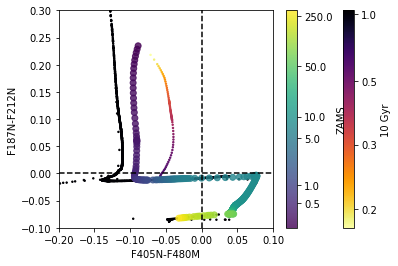

In [6]:
agesel = mist['log10_isochrone_age_yr'] == 10
pl.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='asinh'),
           cmap='inferno_r',
           s=2,
          )
cb = pl.colorbar()
cb.set_label("10 Gyr")
cb.set_ticks([0.2, 0.3, 0.5, 1])


agesel = mist['log10_isochrone_age_yr'] == 5
pl.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='log'),
           alpha=0.8,
          )
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("ZAMS")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F405N-F480M")
pl.ylabel("F187N-F212N")
pl.axis([-0.2,0.1,-0.1,0.3])
agesel.sum()

In [7]:
import numpy as np
import matplotlib
import matplotlib.colors

/scratch/local/9563094/ipykernel_1137927/1073256204.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),


(257, <matplotlib.collections.PathCollection at 0x14c14eb01f10>)

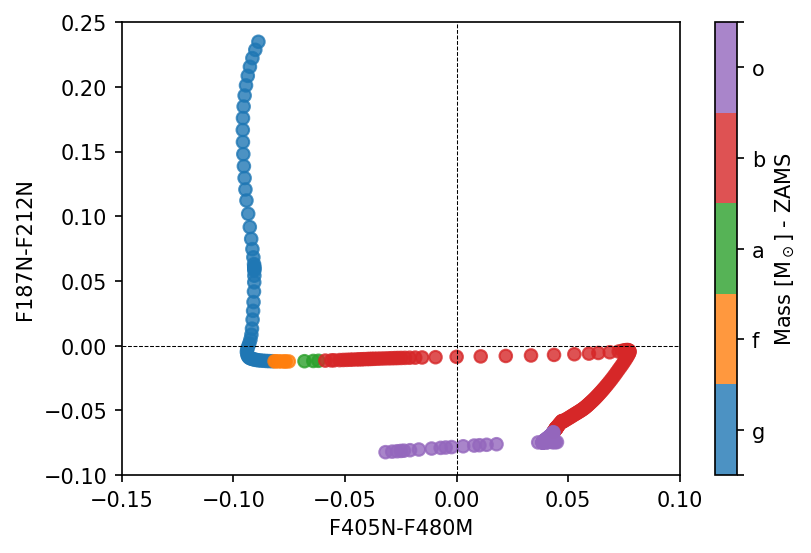

In [19]:
#pl.figure(figsize=(10,8))
pl.figure(dpi=150)
ax = pl.gca()

massrange = {'o': (16, np.max(mist['initial_mass'])),
             'b': (2.1, 16),
             'a': (1.4, 2.1),
             'f': (1.04, 1.4),
             'g': (0.8, 1.04),
            }

color = np.zeros_like(mist['initial_mass'])
for ii, sptype in enumerate('gfabo'):
    thissel = (mist['initial_mass'] >= massrange[sptype][0]) & (mist['initial_mass'] < massrange[sptype][1])
    target = ii * (1./len(massrange))
    color[thissel] = target



#cb = pl.colorbar()
#cb.set_label("Mass [M$_\odot$] - 10 Gyr")
##cb.set_ticks([0.2, 0.3, 0.5, 1])
## cb.set_ticks([0.6, 0.7, 1])
#cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8])
#cb.set_ticklabels(['g', 'f', 'a', 'b', 'o'])


agesel = (mist['log10_isochrone_age_yr'] == 5) & ((mist['F212N'] + distance_modulus) < 20)
sc = ax.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           #c=mist['initial_mass'][agesel],
           #cmap='tab10',
           cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
           c=color[agesel],
           #norm=simple_norm(color[agesel]),
           alpha=0.8,
          )
cb = pl.colorbar(mappable=sc)
#cb.set_ticks([0.5,1,5,10,50,250])
#cb.set_ticks([0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
cb.set_ticks([0.0, 1/5 * 0.8 / 2, 3/10 * 0.8, 5/10 * 0.8, 7/10*0.8, 9/10*0.8, 0.8,])
cb.set_ticklabels(['', 'g', 'f', 'a', 'b', 'o', ''])
cb.set_label("Mass [M$_\odot$] - ZAMS")


# include only detectable sources
# agesel = (mist['log10_isochrone_age_yr'] == 10) & (mist['F212N'] + distance_modulus < 20)
# sc2 = ax.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
#            (mist['F187N']-mist['F212N'])[agesel],
#            #c=mist['initial_mass'][agesel],
#            c=color[agesel],
#            #norm=simple_norm(color[agesel]),
#            #cmap='Set1',
#            cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
#            s=2,
#           )



pl.axhline(0, linestyle='--', color='k', linewidth=0.5)
pl.axvline(0, linestyle='--', color='k', linewidth=0.5)
pl.xlabel("F405N-F480M")
pl.ylabel("F187N-F212N")
pl.axis([-0.15,0.1,-0.1,0.25])
agesel.sum(), sc

/scratch/local/9563094/ipykernel_1137927/2846070378.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
/scratch/local/9563094/ipykernel_1137927/2846070378.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),


(94761, <matplotlib.collections.PathCollection at 0x14c14e86c400>)

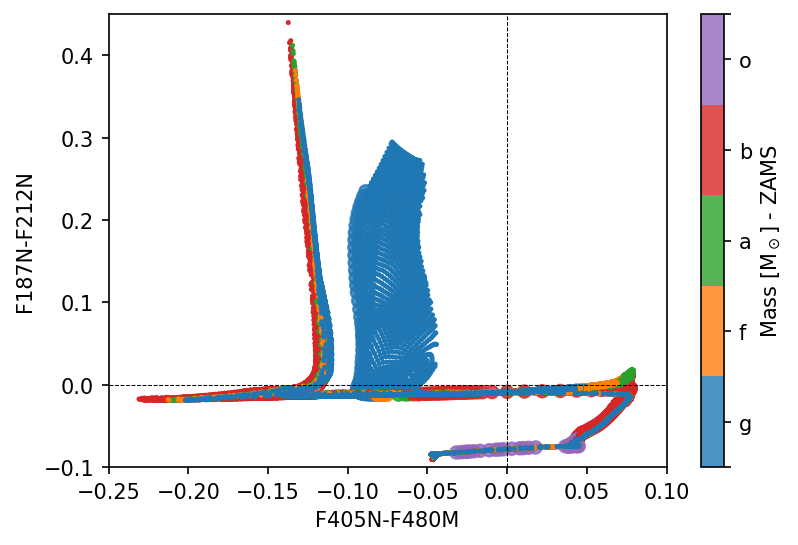

In [20]:
#pl.figure(figsize=(10,8))
pl.figure(dpi=150)
ax = pl.gca()

massrange = {'o': (16, np.max(mist['initial_mass'])),
             'b': (2.1, 16),
             'a': (1.4, 2.1),
             'f': (1.04, 1.4),
             'g': (0.8, 1.04),
            }

color = np.zeros_like(mist['initial_mass'])
for ii, sptype in enumerate('gfabo'):
    thissel = (mist['initial_mass'] >= massrange[sptype][0]) & (mist['initial_mass'] < massrange[sptype][1])
    target = ii * (1./len(massrange))
    color[thissel] = target



#cb = pl.colorbar()
#cb.set_label("Mass [M$_\odot$] - 10 Gyr")
##cb.set_ticks([0.2, 0.3, 0.5, 1])
## cb.set_ticks([0.6, 0.7, 1])
#cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8])
#cb.set_ticklabels(['g', 'f', 'a', 'b', 'o'])


agesel = (mist['log10_isochrone_age_yr'] == 5) & ((mist['F212N'] + distance_modulus) < 20)
sc = ax.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           #c=mist['initial_mass'][agesel],
           #cmap='tab10',
           cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
           c=color[agesel],
           #norm=simple_norm(color[agesel]),
           alpha=0.8,
          )
cb = pl.colorbar(mappable=sc)
#cb.set_ticks([0.5,1,5,10,50,250])
#cb.set_ticks([0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
cb.set_ticks([0.0, 1/5 * 0.8 / 2, 3/10 * 0.8, 5/10 * 0.8, 7/10*0.8, 9/10*0.8, 0.8,])
cb.set_ticklabels(['', 'g', 'f', 'a', 'b', 'o', ''])
cb.set_label("Mass [M$_\odot$] - ZAMS")


# include only detectable sources
agesel = ((mist['F212N'] + distance_modulus) < 20)
sc2 = ax.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           #c=mist['initial_mass'][agesel],
           c=color[agesel],
           #norm=simple_norm(color[agesel]),
           #cmap='Set1',
           cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
           s=2,
          )



pl.axhline(0, linestyle='--', color='k', linewidth=0.5)
pl.axvline(0, linestyle='--', color='k', linewidth=0.5)
pl.xlabel("F405N-F480M")
pl.ylabel("F187N-F212N")
pl.axis([-0.25,0.1,-0.1,0.45])
agesel.sum(), sc2

/scratch/local/9563094/ipykernel_1137927/2365005056.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
/scratch/local/9563094/ipykernel_1137927/2365005056.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),


Text(0.5, 1.0, 'Bright sources ([F212]<15)')

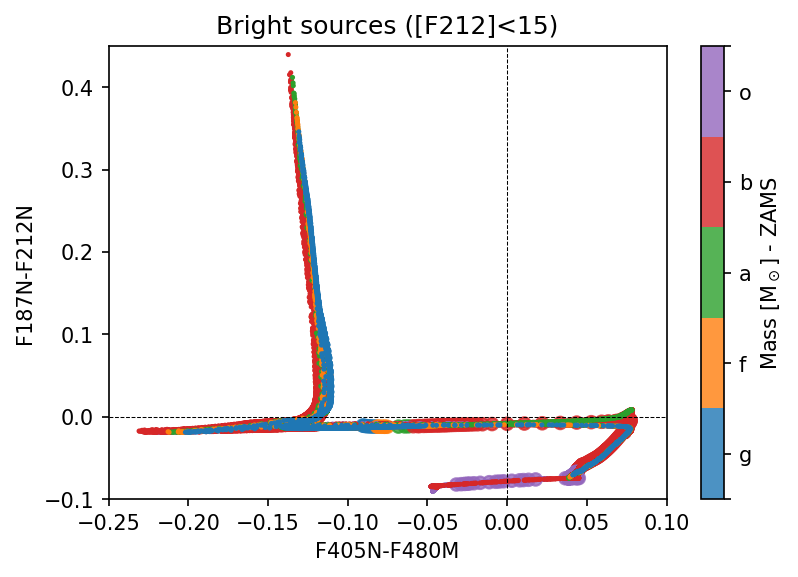

In [21]:
#pl.figure(figsize=(10,8))
pl.figure(dpi=150)
ax = pl.gca()

massrange = {'o': (16, np.max(mist['initial_mass'])),
             'b': (2.1, 16),
             'a': (1.4, 2.1),
             'f': (1.04, 1.4),
             'g': (0.8, 1.04),
            }

color = np.zeros_like(mist['initial_mass'])
for ii, sptype in enumerate('gfabo'):
    thissel = (mist['initial_mass'] >= massrange[sptype][0]) & (mist['initial_mass'] < massrange[sptype][1])
    target = ii * (1./len(massrange))
    color[thissel] = target



#cb = pl.colorbar()
#cb.set_label("Mass [M$_\odot$] - 10 Gyr")
##cb.set_ticks([0.2, 0.3, 0.5, 1])
## cb.set_ticks([0.6, 0.7, 1])
#cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8])
#cb.set_ticklabels(['g', 'f', 'a', 'b', 'o'])


agesel = (mist['log10_isochrone_age_yr'] == 5) & ((mist['F212N'] + distance_modulus) < 15)
sc = ax.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           #c=mist['initial_mass'][agesel],
           #cmap='tab10',
           cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
           c=color[agesel],
           #norm=simple_norm(color[agesel]),
           alpha=0.8,
          )
cb = pl.colorbar(mappable=sc)
#cb.set_ticks([0.5,1,5,10,50,250])
#cb.set_ticks([0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
cb.set_ticks([0.0, 1/5 * 0.8 / 2, 3/10 * 0.8, 5/10 * 0.8, 7/10*0.8, 9/10*0.8, 0.8,])
cb.set_ticklabels(['', 'g', 'f', 'a', 'b', 'o', ''])
cb.set_label("Mass [M$_\odot$] - ZAMS")


# include only detectable sources
agesel = ((mist['F212N'] + distance_modulus) < 15)
sc2 = ax.scatter(mist['F405N'][agesel] - mist['F480M'][agesel],
           (mist['F187N']-mist['F212N'])[agesel],
           #c=mist['initial_mass'][agesel],
           c=color[agesel],
           #norm=simple_norm(color[agesel]),
           #cmap='Set1',
           cmap = matplotlib.colors.ListedColormap(matplotlib.cm.get_cmap("tab10").colors[:5]),
           s=2,
          )



pl.axhline(0, linestyle='--', color='k', linewidth=0.5)
pl.axvline(0, linestyle='--', color='k', linewidth=0.5)
pl.xlabel("F405N-F480M")
pl.ylabel("F187N-F212N")
pl.axis([-0.25,0.1,-0.1,0.45])
pl.title("Bright sources ([F212]<15)")

In [22]:
distance_modulus = 14.59539


257

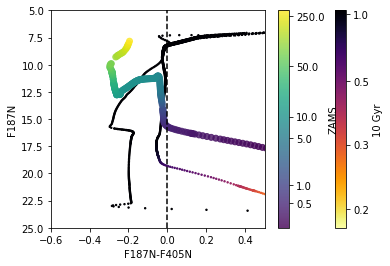

In [23]:
agesel = mist['log10_isochrone_age_yr'] == 10
pl.scatter(mist['F187N'][agesel] - mist['F405N'][agesel],
           (mist['F187N'])[agesel]+distance_modulus,
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='asinh'),
           cmap='inferno_r',
           s=2,
          )
cb = pl.colorbar()
cb.set_label("10 Gyr")
cb.set_ticks([0.2, 0.3, 0.5, 1])


agesel = mist['log10_isochrone_age_yr'] == 5
pl.scatter(mist['F187N'][agesel] - mist['F405N'][agesel],
           (mist['F187N'])[agesel]+distance_modulus,
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='log'),
           alpha=0.8,
          )
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("ZAMS")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F187N-F405N")
pl.ylabel("F187N")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,5)
pl.xlim([-0.6, 0.5])
agesel.sum()

257

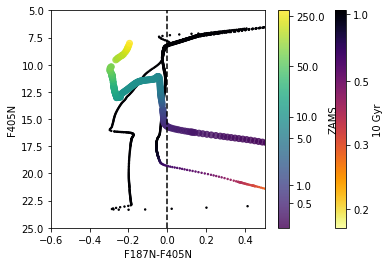

In [24]:
agesel = mist['log10_isochrone_age_yr'] == 10
pl.scatter(mist['F187N'][agesel] - mist['F405N'][agesel],
           (mist['F405N'])[agesel]+distance_modulus,
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='asinh'),
           cmap='inferno_r',
           s=2,
          )
cb = pl.colorbar()
cb.set_label("10 Gyr")
cb.set_ticks([0.2, 0.3, 0.5, 1])


agesel = mist['log10_isochrone_age_yr'] == 5
pl.scatter(mist['F187N'][agesel] - mist['F405N'][agesel],
           (mist['F405N'])[agesel]+distance_modulus,
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='log'),
           alpha=0.8,
          )
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("ZAMS")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F187N-F405N")
pl.ylabel("F405N")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,5)
pl.xlim([-0.6, 0.5])
agesel.sum()

257

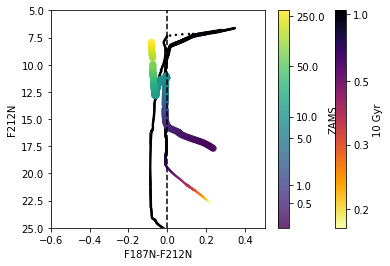

In [25]:
agesel = mist['log10_isochrone_age_yr'] == 10
pl.scatter(mist['F187N'][agesel] - mist['F212N'][agesel],
           (mist['F212N'])[agesel]+distance_modulus,
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='asinh'),
           cmap='inferno_r',
           s=2,
          )
cb = pl.colorbar()
cb.set_label("10 Gyr")
cb.set_ticks([0.2, 0.3, 0.5, 1])


agesel = mist['log10_isochrone_age_yr'] == 5
pl.scatter(mist['F187N'][agesel] - mist['F212N'][agesel],
           (mist['F212N'])[agesel]+distance_modulus,
           c=mist['initial_mass'][agesel],
           norm=simple_norm(mist['initial_mass'][agesel], stretch='log'),
           alpha=0.8,
          )
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("ZAMS")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F187N-F212N")
pl.ylabel("F212N")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,5)
pl.xlim([-0.6, 0.5])
agesel.sum()

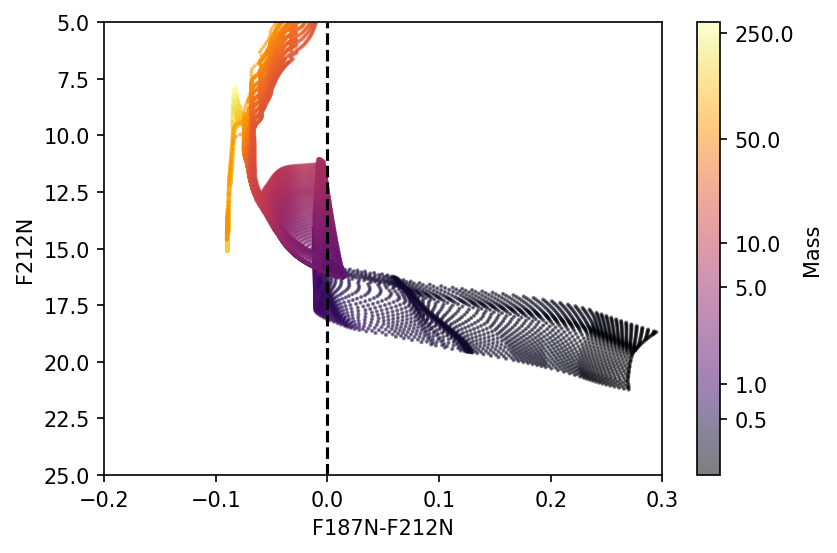

In [34]:
pl.figure(dpi=150)

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age < 7:
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F187N'][agesel] - mist['F212N'][agesel],
                   (mist['F212N'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )
        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F187N-F212N")
pl.ylabel("F212N")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,5)
pl.xlim([-0.2, 0.3]);
#agesel.sum()

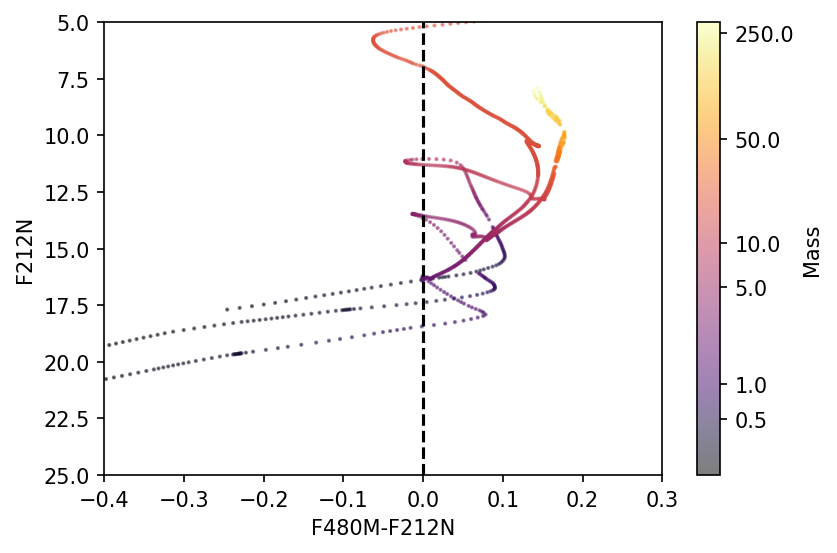

In [38]:
pl.figure(dpi=150)

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age in (5,6,7):
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F480M'][agesel] - mist['F212N'][agesel],
                   (mist['F212N'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )
        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F480M-F212N")
pl.ylabel("F212N")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,5)
pl.xlim([-0.4, 0.3]);
#agesel.sum()

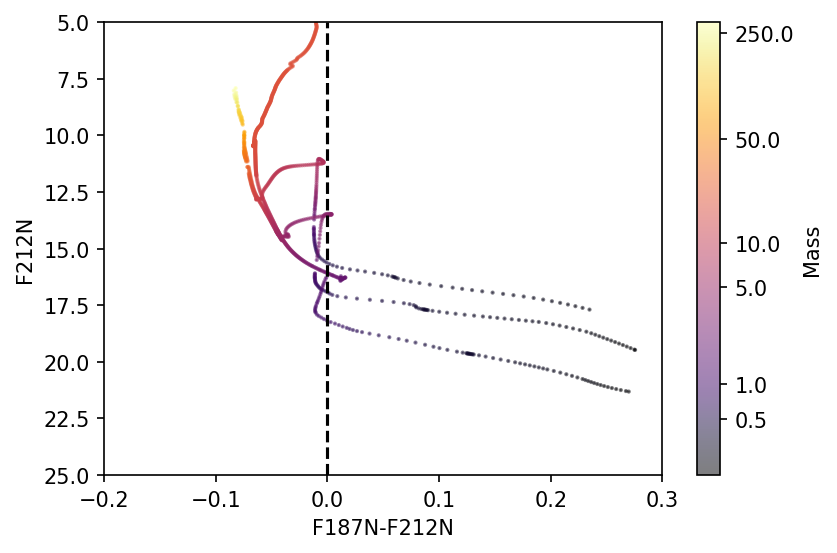

In [39]:
pl.figure(dpi=150)

norm = simple_norm(mist['initial_mass'][mist['log10_isochrone_age_yr'] < 7], stretch='log')
for age in np.unique(mist['log10_isochrone_age_yr']):
    if age in (5,6,7):
    
        agesel = mist['log10_isochrone_age_yr'] == age
        pl.scatter(mist['F187N'][agesel] - mist['F212N'][agesel],
                   (mist['F212N'])[agesel]+distance_modulus,
                   c=mist['initial_mass'][agesel],
                   norm=norm,
                   cmap='inferno',
                   alpha=0.5,
                   s=1,
                  )
        
cb = pl.colorbar()
cb.set_ticks([0.5,1,5,10,50,250])
cb.set_label("Mass")

pl.axhline(0, linestyle='--', color='k')
pl.axvline(0, linestyle='--', color='k')
pl.xlabel("F187N-F212N")
pl.ylabel("F212N")
#pl.axis([-0.2,0.1,-0.1,0.3])
pl.ylim(25,5)
pl.xlim([-0.2, 0.3]);
#agesel.sum()